## Make some data

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import umap

import datetime
t = str(datetime.datetime.now()).replace(" ", "_").replace(":", "")

"""
n_samples = 1000
# Generate some data
X0, y = make_classification(n_samples=n_samples, n_features=100, 
                           n_informative=10, n_redundant=80, 
                           n_repeated=10, random_state=1)
X1 = []
# add in some low variance features
for i in range(0, 50):
    loc = np.random.randint(0,10)
    scale = i * 0.02
    x = np.random.normal(loc=loc, scale=scale, size=(1, 1000)).tolist()[0]
    X1.append(x)

X1 = np.array(X1).T

print(t)
"""

'\nn_samples = 1000\n# Generate some data\nX0, y = make_classification(n_samples=n_samples, n_features=100, \n                           n_informative=10, n_redundant=80, \n                           n_repeated=10, random_state=1)\nX1 = []\n# add in some low variance features\nfor i in range(0, 50):\n    loc = np.random.randint(0,10)\n    scale = i * 0.02\n    x = np.random.normal(loc=loc, scale=scale, size=(1, 1000)).tolist()[0]\n    X1.append(x)\n\nX1 = np.array(X1).T\n\nprint(t)\n'

In [2]:
"""
data = (pd.concat([pd.DataFrame(X0), pd.DataFrame(X1)], axis=1))
new_index = np.arange(0, (X0.shape[1] + X1.shape[1]) )
data.columns = new_index

data = data[np.random.choice(new_index, len(new_index))]
data.columns = new_index
data['target'] = y
data.to_csv(f'{t}.csv', index=False)
"""

"\ndata = (pd.concat([pd.DataFrame(X0), pd.DataFrame(X1)], axis=1))\nnew_index = np.arange(0, (X0.shape[1] + X1.shape[1]) )\ndata.columns = new_index\n\ndata = data[np.random.choice(new_index, len(new_index))]\ndata.columns = new_index\ndata['target'] = y\ndata.to_csv(f'{t}.csv', index=False)\n"

In [2]:
data =pd.read_csv("candidate-2024-08-21_071931.647000.csv")
data

0         1         2         3         4         5         6  \
0    1.607084  4.682270  2.540299  1.729016  1.729016  2.540299 -1.300672   
1   -8.102064 -2.583886 -4.267934  0.001937  0.001937 -4.267934 -3.525349   
2   -4.231759 -2.730118 -4.090007 -2.994795 -2.994795 -4.090007  2.637463   
3    0.338523  2.037447 -4.802257  1.588658  1.588658 -4.802257 -2.674832   
4    2.560003 -2.237003  0.315011 -0.650438 -0.650438  0.315011  3.242902   
..        ...       ...       ...       ...       ...       ...       ...   
995 -6.048134  4.299141 -8.042868  2.993890  2.993890 -8.042868 -7.469135   
996 -0.560387 -4.031805  2.691557 -0.174906 -0.174906  2.691557 -0.959668   
997  7.609040  3.203054 -3.869773  0.262054  0.262054 -3.869773  6.942881   
998  2.918403  5.022534  3.459261  1.737496  1.737496  3.459261  1.118135   
999  1.130536 -2.282860  1.660701 -2.818864 -2.818864  1.660701  0.785077   

            7         8         9  ...       141       142       143  \
0    5.896111  5.676143  1.757258  ...  4.743652 -0.681672  2.556869   
1    6.242218  6.115635 -2.906536  ...  5.085606 -1.470726  2.582580   
2    5.783663  7.023237 -4.900295  ...  4.850947  2.075097  3.115747   
3    6.534170  6.688421 -3.409198  ...  4.854401  2.208260  2.066013   
4    6.928813  7.852551  3.116622  ...  5.104821  3.209046  2.441144   
..        ...       ...       ...  ...       ...       ...       ...   
995  5.842113  5.455464 -5.588568  ...  4.899164  1.193393  2.967759   
996  5.702601  6.097483 -0.370964  ...  5.071804 -4.537965  1.252036   
997  6.178166  6.290133  0.188484  ...  5.156138  2.042815  4.264582   
998  5.668431  6.802010  1.484957  ...  5.061157 -2.177413  1.758799   
999  5.947843  6.255133  3.597436  ...  5.061439 -3.532860  2.155585   

          144  145       146       147       148       149  target  
0    5.676143  8.0  3.772249  2.540299  2.556869 -0.681672       0  
1    6.115635  8.0  4.254158 -4.267934  2.582580 -1.470726       1  
2    7.023237  8.0  3.884678 -4.090007  3.115747  2.075097       1  
3    6.688421  8.0  3.850862 -4.802257  2.066013  2.208260       1  
4    7.852551  8.0  3.812800  0.315011  2.441144  3.209046       1  
..        ...  ...       ...       ...       ...       ...     ...  
995  5.455464  8.0  3.986519 -8.042868  2.967759  1.193393       1  
996  6.097483  8.0  4.301982  2.691557  1.252036 -4.537965       0  
997  6.290133  8.0  4.173103 -3.869773  4.264582  2.042815       1  
998  6.802010  8.0  3.793923  3.459261  1.758799 -2.177413       0  
999  6.255133  8.0  4.007557  1.660701  2.155585 -3.532860       1  

[1000 rows x 151 columns]

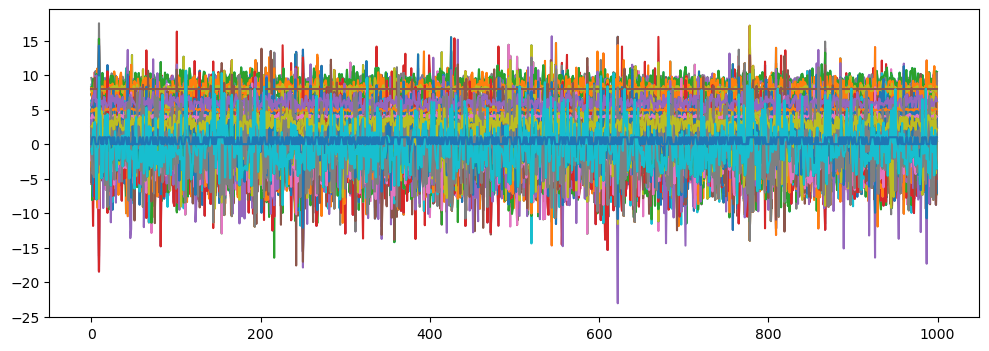

In [3]:
data.plot(figsize=(12,4), legend=None);

In [4]:
data.shape

(1000, 151)

## Split the data into training and testing sets

In [5]:
X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Look at variance in the features

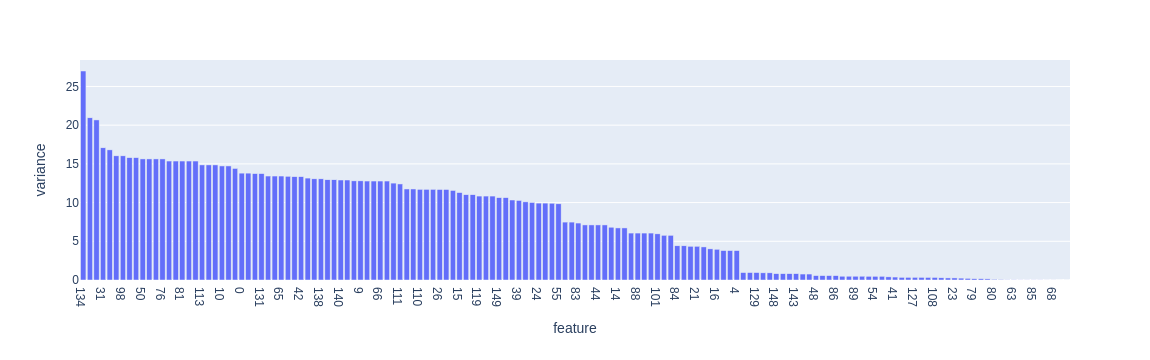

In [6]:
feature_var_dict = {}
for i in range(X.shape[1]):
    feature = X_train[:,i]
    f_variance = np.var(feature)
    feature_var_dict[i] = f_variance

var_df = (pd.DataFrame.from_dict(feature_var_dict, orient='index').reset_index()
          .rename({'index': 'feature', 0: 'variance'}, axis=1)
          .sort_values("variance", ascending=False)
          .astype({"feature": str})
         )

var_df

px.bar(data_frame=var_df, x='feature', y='variance')

## Scale

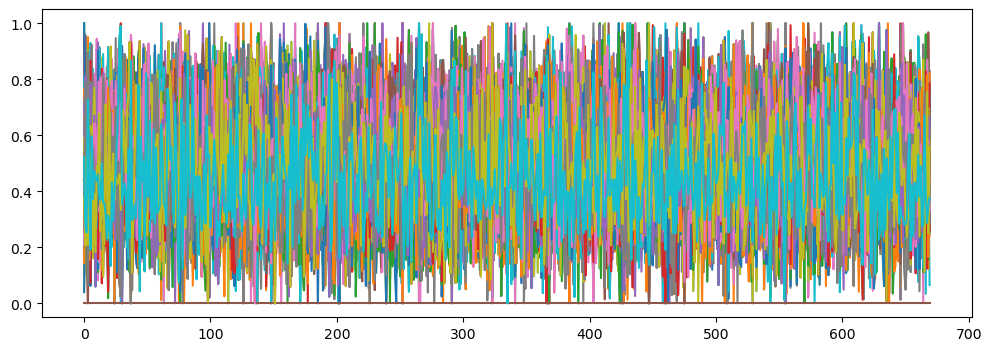

In [7]:
min_max_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)
plt.figure(figsize=(12,4))
plt.plot(X_train_scaled);

## First model

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       154
           1       0.93      0.90      0.92       176

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



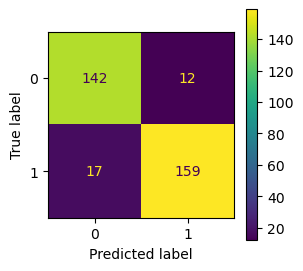

In [8]:
model1_RF = RandomForestClassifier()
model1_RF.fit(X_train_scaled, y_train)
model1_RF_pred = model1_RF.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model1_RF_pred), 
    display_labels=model1_RF.classes_                             
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, model1_RF_pred))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26       154
           1       0.30      0.27      0.29       176

    accuracy                           0.27       330
   macro avg       0.27      0.27      0.27       330
weighted avg       0.28      0.27      0.27       330



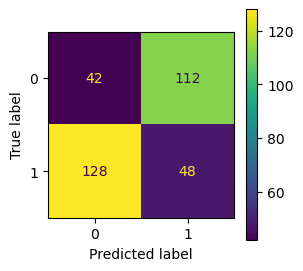

In [9]:
model1_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
model1_KM.fit(X_train_scaled, y_train)
model1_KM_pred = model1_KM.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model1_KM_pred), 
    #display_labels=model1_KM.classes_                            
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);


print(classification_report(y_test, model1_KM_pred))

In [10]:
print(y_train.mean(), y_test.mean()) # since we have zeros and ones for our 
                                     # classes we can use the mean to look 
                                     # class balance

0.48507462686567165 0.5333333333333333


## Remove columns with very low variance

In [11]:
low_var_features = var_df.query("variance < 1")['feature'].astype(str).values.tolist()
len(low_var_features)

50

### Reprocess data after action

In [12]:
data = data.drop(low_var_features, axis=1)

X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

min_max_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [13]:
X_train_scaled.shape

(670, 100)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       154
           1       0.94      0.90      0.92       176

    accuracy                           0.92       330
   macro avg       0.91      0.92      0.91       330
weighted avg       0.92      0.92      0.92       330



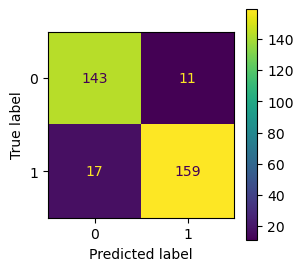

In [14]:
model2_RF = RandomForestClassifier()
model2_RF.fit(X_train_scaled, y_train)
model2_RF_pred = model2_RF.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model2_RF_pred), 
    display_labels=model2_RF.classes_                             
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, model2_RF_pred))

              precision    recall  f1-score   support

           0       0.26      0.30      0.28       154
           1       0.31      0.27      0.29       176

    accuracy                           0.28       330
   macro avg       0.29      0.29      0.28       330
weighted avg       0.29      0.28      0.29       330



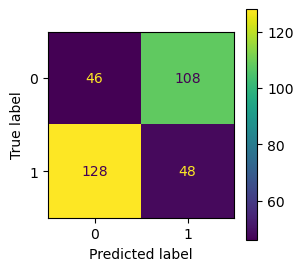

In [15]:
model2_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
model2_KM.fit(X_train_scaled, y_train)
model2_KM_pred = model2_KM.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model2_KM_pred), 
    #display_labels=model1_KM.classes_                            
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);


print(classification_report(y_test, model2_KM_pred))

In [16]:
X_train_scaled.shape

(670, 100)

## Get highly correlated features

* reduce redundancy

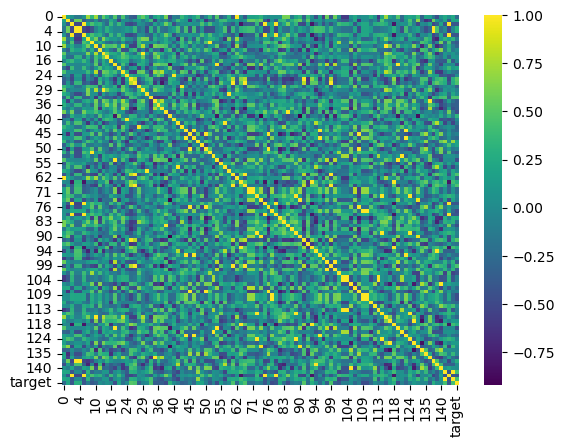

In [17]:
corrMat = data.corr()
sns.heatmap(corrMat, cmap='viridis');

In [18]:
corrMat

0         1         2         3         4         5         6  \
0       1.000000  0.198243  0.054893 -0.151990 -0.151990  0.054893  0.717749   
1       0.198243  1.000000 -0.376224  0.568190  0.568190 -0.376224 -0.171387   
2       0.054893 -0.376224  1.000000 -0.513236 -0.513236  1.000000  0.188168   
3      -0.151990  0.568190 -0.513236  1.000000  1.000000 -0.513236 -0.607893   
4      -0.151990  0.568190 -0.513236  1.000000  1.000000 -0.513236 -0.607893   
...          ...       ...       ...       ...       ...       ...       ...   
140     0.058183 -0.107701  0.201552 -0.229587 -0.229587  0.201552  0.105793   
142     0.232833  0.206608 -0.404612 -0.023549 -0.023549 -0.404612  0.319835   
147     0.054893 -0.376224  1.000000 -0.513236 -0.513236  1.000000  0.188168   
149     0.232833  0.206608 -0.404612 -0.023549 -0.023549 -0.404612  0.319835   
target -0.266112  0.201121 -0.407656  0.282563  0.282563 -0.407656 -0.121559   

               9        10        13  ...       134       135       136  \
0       0.329429  0.722033 -0.092151  ... -0.320481  0.201462  0.180681   
1      -0.253290  0.023616 -0.331401  ... -0.290505 -0.675040 -0.554708   
2       0.437405  0.262043  0.318653  ...  0.015388 -0.044133  0.172287   
3      -0.450024 -0.076694  0.156791  ... -0.209011 -0.463826 -0.270026   
4      -0.450024 -0.076694  0.156791  ... -0.209011 -0.463826 -0.270026   
...          ...       ...       ...  ...       ...       ...       ...   
140     0.587844 -0.465484  0.659477  ...  0.753343  0.437634 -0.595477   
142    -0.283078 -0.103138 -0.130758  ...  0.007214  0.358160 -0.217829   
147     0.437405  0.262043  0.318653  ...  0.015388 -0.044133  0.172287   
149    -0.283078 -0.103138 -0.130758  ...  0.007214  0.358160 -0.217829   
target -0.387073 -0.299066  0.019063  ... -0.032189 -0.017721 -0.354879   

             137       138       140       142       147       149    target  
0      -0.151990 -0.458971  0.058183  0.232833  0.054893  0.232833 -0.266112  
1       0.568190  0.103381 -0.107701  0.206608 -0.376224  0.206608  0.201121  
2      -0.513236 -0.328514  0.201552 -0.404612  1.000000 -0.404612 -0.407656  
3       1.000000  0.449622 -0.229587 -0.023549 -0.513236 -0.023549  0.282563  
4       1.000000  0.449622 -0.229587 -0.023549 -0.513236 -0.023549  0.282563  
...          ...       ...       ...       ...       ...       ...       ...  
140    -0.229587  0.356182  1.000000  0.067961  0.201552  0.067961  0.022156  
142    -0.023549 -0.333567  0.067961  1.000000 -0.404612  1.000000  0.427294  
147    -0.513236 -0.328514  0.201552 -0.404612  1.000000 -0.404612 -0.407656  
149    -0.023549 -0.333567  0.067961  1.000000 -0.404612  1.000000  0.427294  
target  0.282563  0.025166  0.022156  0.427294 -0.407656  0.427294  1.000000  

[101 rows x 101 columns]

In [19]:
discard = (corrMat                  # we take the abs of the correlation matrix
           .stack()
           .reset_index()
           .rename({'level_0': 'A', 
                    'level_1': 'B', 
                    0: 'corr'}, 
                   axis=1)
            
            .query("A != B")
            .query("corr >=  0.85")        # this correlation cutoff can vary depending on what we know about our data
            .drop(['B', 'corr'], axis=1)
            .drop_duplicates()
            ['A']
            .values
          )
discard 

array(['0', '2', '3', '4', '5', '9', '10', '14', '18', '24', '26', '27',
       '28', '29', '30', '33', '38', '40', '42', '43', '44', '45', '46',
       '50', '51', '52', '53', '56', '58', '61', '62', '65', '66', '70',
       '71', '73', '74', '75', '76', '78', '81', '84', '88', '90', '91',
       '93', '94', '96', '98', '99', '100', '103', '104', '105', '107',
       '109', '110', '113', '114', '115', '116', '118', '119', '120',
       '122', '124', '131', '133', '136', '137', '138', '140', '142',
       '147', '149'], dtype=object)

In [20]:
len(discard)

75

In [21]:
data = data.drop(discard, axis=1)
X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

min_max_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)
X_train_scaled.shape

(670, 25)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       154
           1       0.93      0.91      0.92       176

    accuracy                           0.92       330
   macro avg       0.91      0.92      0.91       330
weighted avg       0.92      0.92      0.92       330



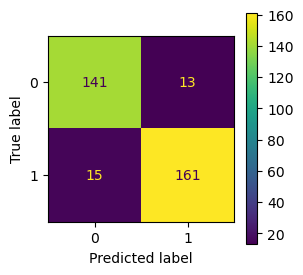

In [22]:
model3_RF = RandomForestClassifier()
model3_RF.fit(X_train_scaled, y_train)
model3_RF_pred = model3_RF.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model3_RF_pred), 
    display_labels=model3_RF.classes_                             
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, model3_RF_pred))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       154
           1       0.58      0.57      0.57       176

    accuracy                           0.55       330
   macro avg       0.55      0.55      0.55       330
weighted avg       0.55      0.55      0.55       330



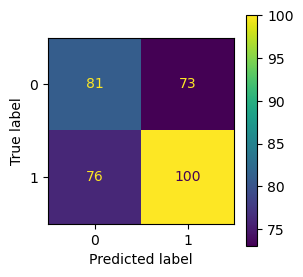

In [23]:
model3_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
model3_KM.fit(X_train_scaled, y_train)
model3_KM_pred = model3_KM.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model3_KM_pred), 
    #display_labels=model1_KM.classes_                            
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);


print(classification_report(y_test, model3_KM_pred))

## What if we don't discard correlated feature but combine them?

In [24]:
(corrMat                  # we take the abs of the correlation matrix
   .stack()
   .reset_index()
   .rename({'level_0': 'A', 
            'level_1': 'B', 
            0: 'corr'}, 
           axis=1)
    
    .query("A != B")
    .query("corr >=  0.85")        # this correlation cutoff can vary depending on what we know about our data
     ['corr']
    .mean()
 )

np.float64(0.9986014750502571)

```
Even though in our case it won't make sense (since the variables are so highly correlated),
but one can also combine variables: multiplying them together, summing deviding ... meam.
Even better if you have some domain knowledge on the data, some of these methods of combining
would make more sense. As an excample, say you had a dataset for predicting house prises and you have width
and length, then multiplying these would give you the area. Now it makes sense to keep area
and remove width and length
```

## How can we find feature importance?

Let's import our data from scratch again and see what we can find

In [25]:
data = pd.read_csv("candidate-2024-08-21_071931.647000.csv")
model_feature_importance = RandomForestClassifier().fit(data.drop('target', axis=1),
                                                       data['target'])
importance = model_feature_importance.feature_importances_
importance

array([0.00459827, 0.00583688, 0.01099619, 0.00901504, 0.00706877,
       0.01224851, 0.0043642 , 0.00208083, 0.00178754, 0.0089956 ,
       0.00776   , 0.00173967, 0.00264783, 0.00286201, 0.00494018,
       0.00292951, 0.00447864, 0.0013932 , 0.01830931, 0.00151001,
       0.00607422, 0.00249581, 0.00324724, 0.00232897, 0.00684053,
       0.00255212, 0.02244449, 0.01186794, 0.00825077, 0.00295669,
       0.00392567, 0.02123962, 0.00070684, 0.00686833, 0.00144537,
       0.00163469, 0.01492659, 0.00298002, 0.02243649, 0.01609823,
       0.00478894, 0.00185337, 0.00465551, 0.0123312 , 0.00312112,
       0.01149868, 0.00526143, 0.00684825, 0.00075381, 0.00702854,
       0.00689757, 0.0186116 , 0.01211042, 0.03044345, 0.00142769,
       0.00221208, 0.00532096, 0.00167522, 0.00319445, 0.00157044,
       0.00138451, 0.02461288, 0.00603756, 0.00161796, 0.00253012,
       0.00317106, 0.01505292, 0.00189532, 0.00135644, 0.00168766,
       0.00482148, 0.00633932, 0.00126757, 0.00276023, 0.00339

In [26]:
names = model_feature_importance.feature_names_in_
names

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144

In [27]:
feature_importance_df = pd.DataFrame.from_dict({"feature": names,
                                               "importance": importance}
                                              ).sort_values("importance", ascending=False)

<Axes: >

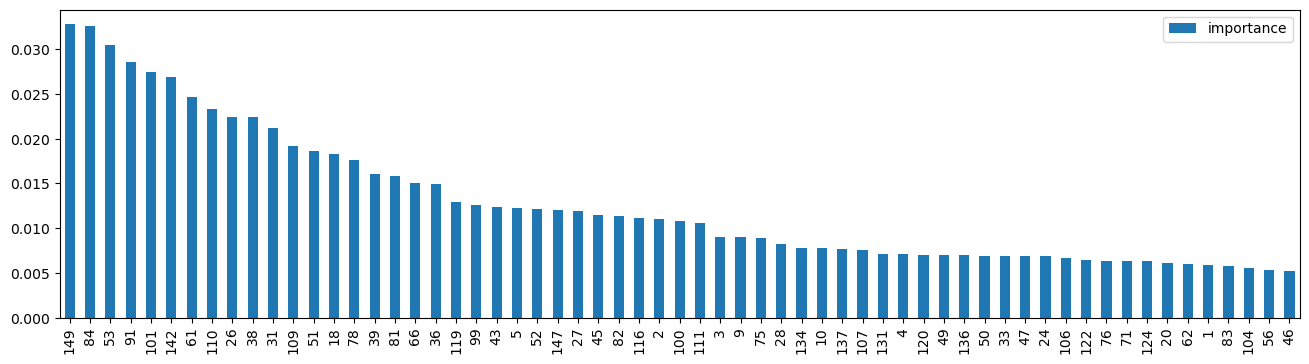

In [28]:
feature_importance_df.query("importance >= 0.005").plot(kind='bar', figsize=(16,4))

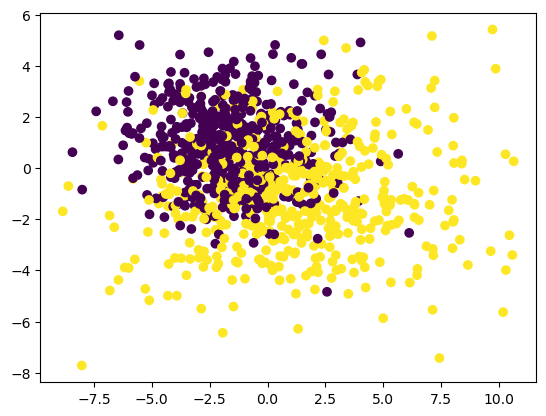

In [30]:
plt.scatter(data=data, x='149', y='84', c='target')

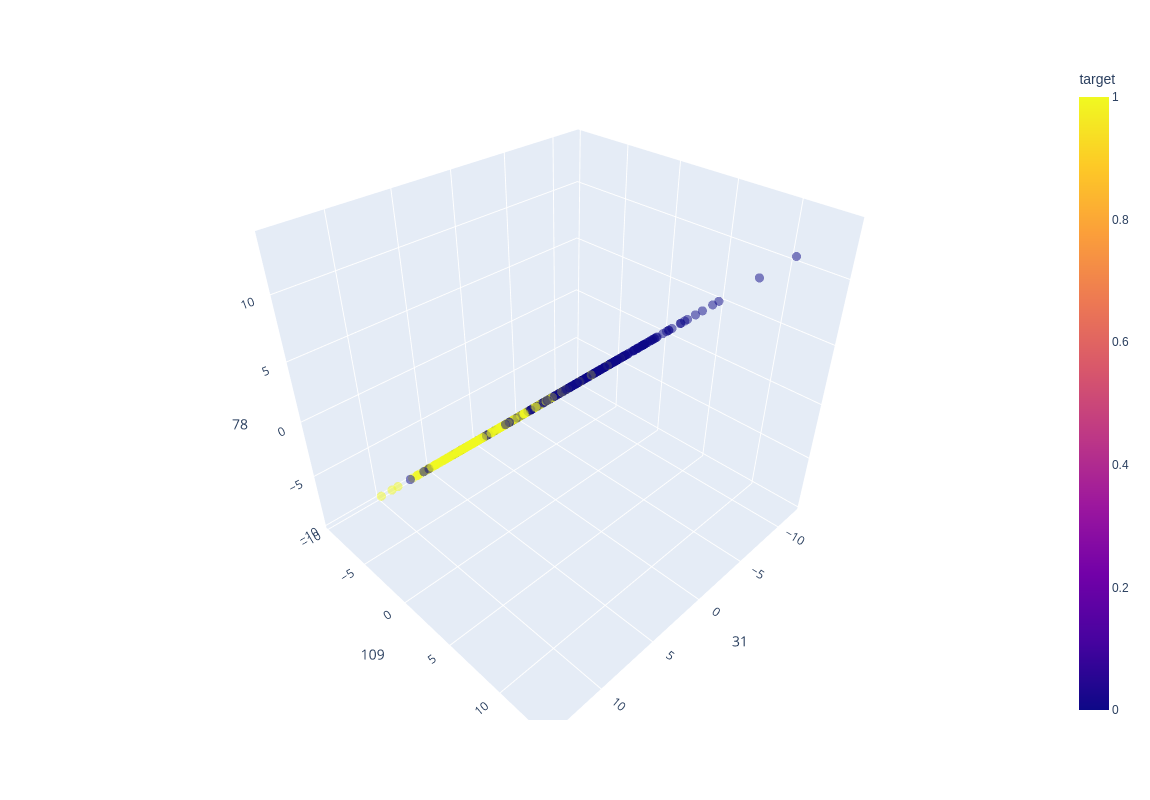

In [31]:
fig = px.scatter_3d(data_frame=data, x='31', y='109', z='78', opacity=0.5,
                    color='target', height=800, width=1000)
fig.update_traces(marker_size = 3)
fig.show()

## Do the data transforms again

In [32]:
def  transform_data(dataframe=data, top_n_features=2):
    selection = feature_importance_df.iloc[0:top_n_features,0].values
    print("Features in order:", selection, "\n")
    X = data[selection].values
    y = data['target'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    min_max_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = min_max_scaler.transform(X_train)
    X_test_scaled = min_max_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test




Features in order: ['149' '84'] 

              precision    recall  f1-score   support

           0       0.11      0.10      0.11       154
           1       0.30      0.34      0.32       176

    accuracy                           0.23       330
   macro avg       0.21      0.22      0.21       330
weighted avg       0.21      0.23      0.22       330



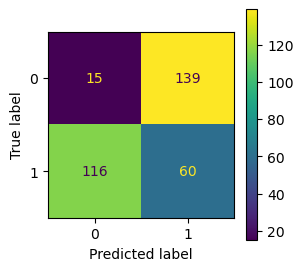

In [33]:
# Slecect the number of features
X_train_scaled, X_test_scaled, y_train, y_test = transform_data(data, 2)

model4_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
model4_KM.fit(X_train_scaled, y_train)
model4_KM_pred = model4_KM.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model4_KM_pred), 
    #display_labels=model1_KM.classes_                            
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, model4_KM_pred))

# Dimentionality reduction, latent space

## Principle component analysis

In [34]:
from sklearn.decomposition import PCA

In [35]:
data = pd.read_csv("candidate-2024-08-21_071931.647000.csv")

X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

min_max_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [36]:
keep_fisrt_n = 30
pca = PCA(n_components=keep_fisrt_n)#X_train_scaled.shape[1]
pComponents = pca.fit_transform(X_train_scaled)
pComponents.shape

(670, 30)

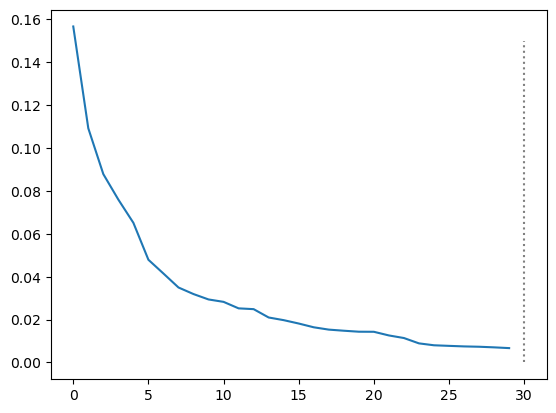

In [37]:


plt.plot(pca.explained_variance_ratio_)
plt.vlines(x=keep_fisrt_n, ymin=0, ymax=0.15, ls="dotted", color='gray');

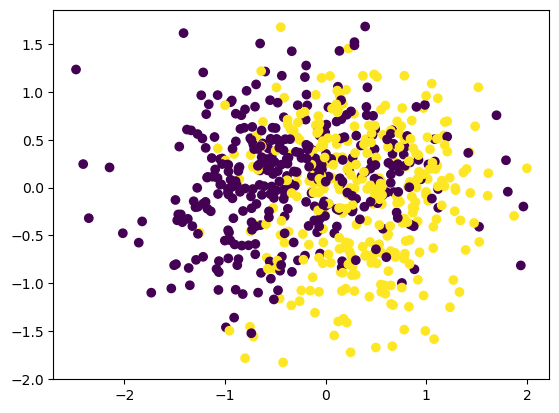

In [38]:
pcaDf = pd.DataFrame(pComponents)
pcaDf['target'] = y_train
plt.scatter(pcaDf[0], pcaDf[1], c=pcaDf['target'])

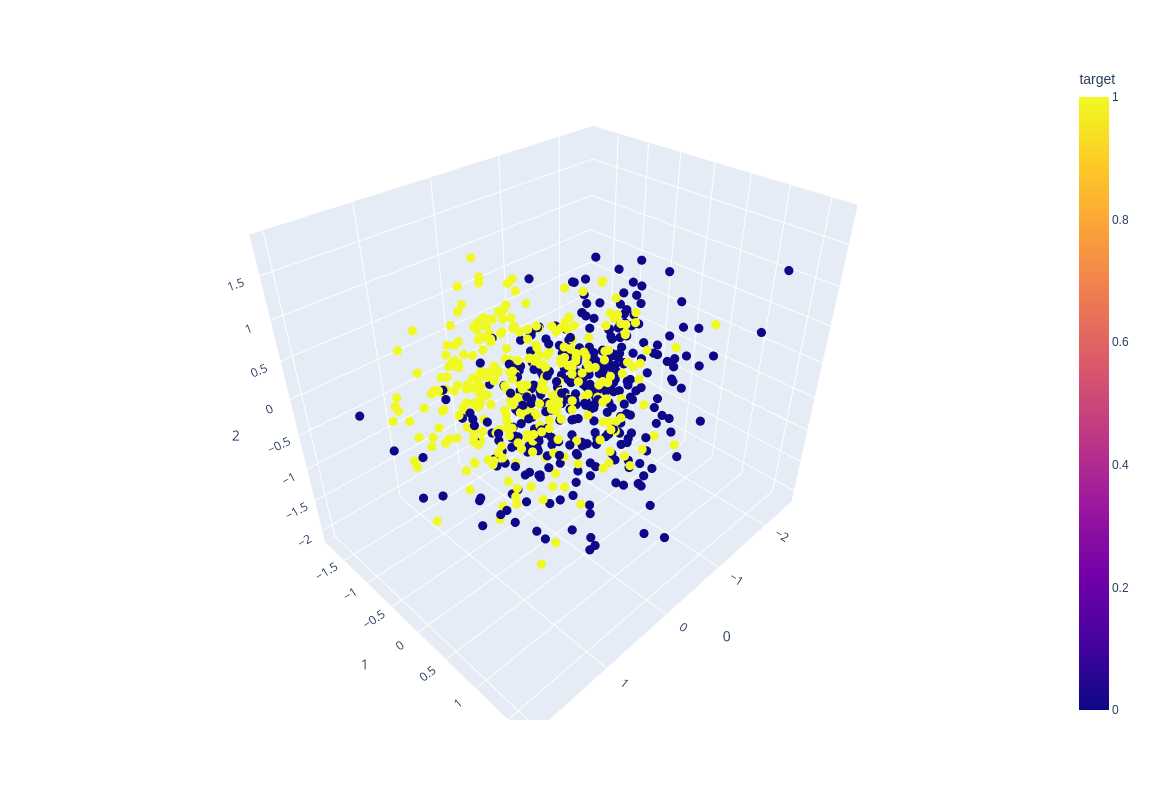

In [39]:
fig = px.scatter_3d(data_frame=pcaDf, x=0, y=1, z=2, color='target', height=800, width=1000)
fig.update_traces(marker_size=3)
fig

In [40]:
pComponents.shape

(670, 30)

In [41]:
pComponents_test = pca.transform(X_test_scaled)

              precision    recall  f1-score   support

           0       0.24      0.26      0.25       154
           1       0.30      0.28      0.29       176

    accuracy                           0.27       330
   macro avg       0.27      0.27      0.27       330
weighted avg       0.27      0.27      0.27       330



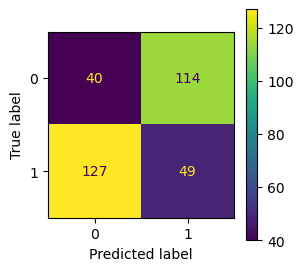

In [42]:
PCA_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
PCA_KM.fit(pComponents, y_train)
PCA_KM_pred = PCA_KM.predict(pComponents_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, PCA_KM_pred), 
    #display_labels=model1_KM.classes_                            
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, PCA_KM_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       154
           1       0.92      0.86      0.89       176

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



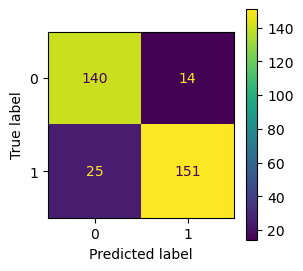

In [43]:
PCA_RFC = RandomForestClassifier()
PCA_RFC.fit(pComponents, y_train)
PCA_RFC_pred = PCA_RFC.predict(pComponents_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, PCA_RFC_pred), 
    #display_labels=model1_KM.classes_                            
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, PCA_RFC_pred))

## Uniform Manifold Approximation and Projection

In [44]:
reducer = umap.UMAP(n_neighbors=5, n_components=5)
reducer = reducer.fit(X_train_scaled)
embedding_train = reducer.transform(X_train_scaled)
embedding_test = reducer.transform(X_test_scaled)

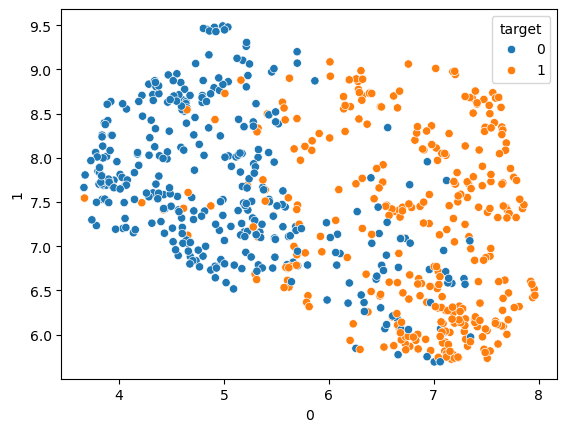

In [45]:
umap_plot_df = pd.DataFrame(embedding_train)
umap_plot_df['target'] = y_train
sns.scatterplot(data=umap_plot_df, x=0, y=1, hue='target');

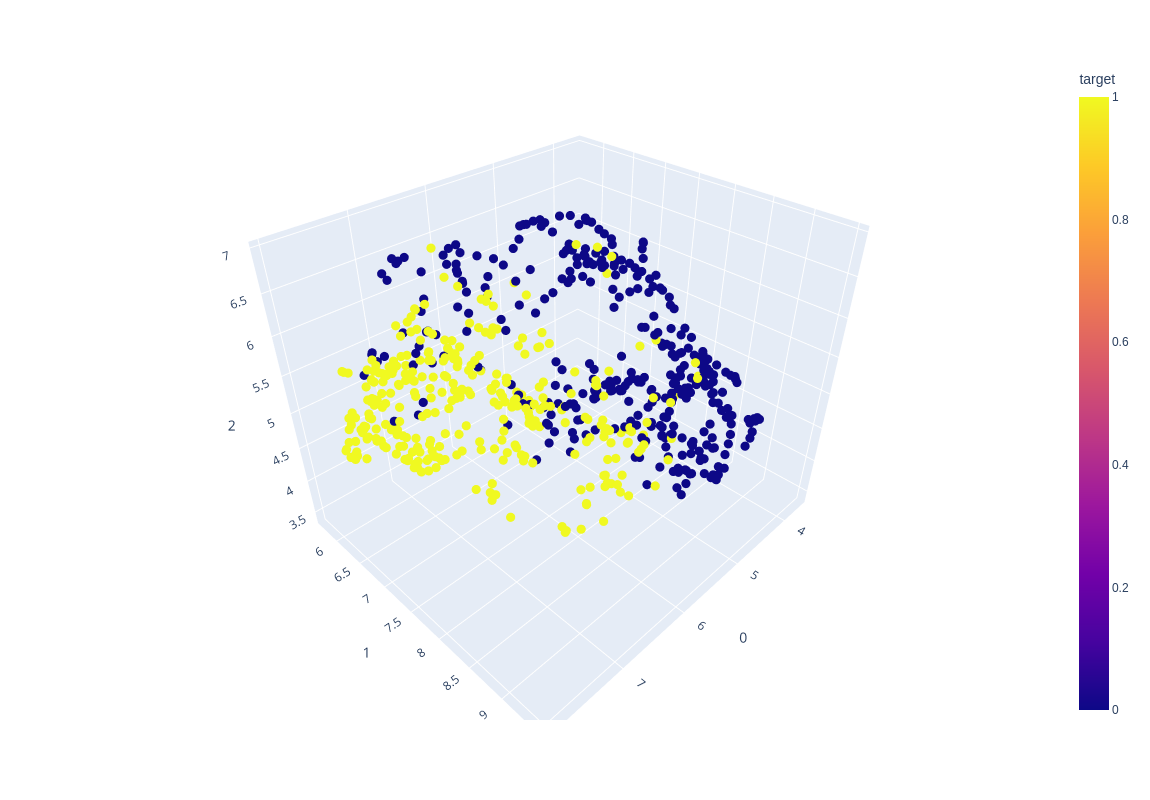

In [46]:
fig = px.scatter_3d(data_frame=umap_plot_df, x=0, y=1, z=2, 
                    color='target', height=800, width=1000)
fig.update_traces(marker_size=3)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       154
           1       0.85      0.80      0.82       176

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.81       330
weighted avg       0.82      0.82      0.82       330



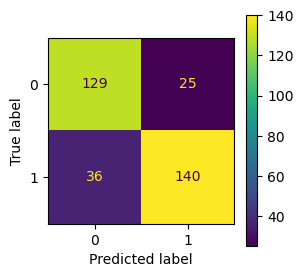

In [47]:
UMAP_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
UMAP_KM.fit(embedding_train, y_train)
UMAP_KM_pred = UMAP_KM.predict(embedding_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, UMAP_KM_pred), 
    #display_labels=model1_KM.classes_                            
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, UMAP_KM_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       154
           1       0.89      0.85      0.87       176

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.87      0.86      0.86       330



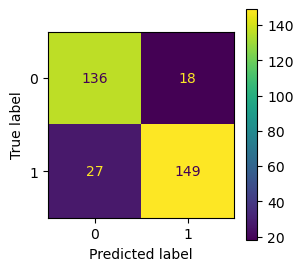

In [48]:
UMAP_RFC = RandomForestClassifier()
UMAP_RFC.fit(embedding_train, y_train)
UMAP_RFC_pred = UMAP_RFC.predict(embedding_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, UMAP_RFC_pred), 
    #display_labels=model1_KM.classes_                            
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, UMAP_RFC_pred))

https://thepythoncode.com/article/feature-selection-and-feature-engineering-using-python